# Project: Investigate a Dataset - TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

### Question(s) for Analysis

**The dataset that will be analyzed in this report is the TMDB movie data containing information of over 10,000 movies from The Movie Database (TMDB). In this report, the data analysis process will be used to answer the following questions:**

*1. What is the average production budget and gross revenue of the films in the dataset?*

>*Which movie had the minimum budget, maximum budget, minimum revenue and maximum revenue?*

>*Are the bottom 25% of films actually profitable or do they lose money?*

>*What are the highest production budget and highest revenue of a film?*

>*How much revenue did the highest and lowest budget films make?*

*2. Percentage of Films with a budget greater than revenue (Money losing films).* 

*3. What kinds of properties are associated with movies that have high revenues?*

*4. Which genres are most popular over the decades?*

**This report will use Python libraries that include Numpy, Pandas, Seaborn, and Matplotlib.**

In [53]:
# packages to use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling



**Assessing the Data**

*Using pandas to explore the dataset and answer questions about the characteristics of the data:*

1. Number of rows and columns in the dataset
2. Duplicate rows in the dataset
3. Datatypes of columns
4. Any NaN values

In [2]:
# Load the dataset and print a few lines.

movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Explore the tail of the dataset

movies_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


There is a 2066 film in our dataset!

In [4]:
# Explore the shape of the dataset

movies_df.shape

(10866, 21)

The dataset have 10866 rows and 21 columns

In [5]:
# Check out the column names

movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# Explore the number of duplicate rows in the dataframe

movies_df.duplicated().sum()

1

There is 1 duplicate row in the dataframe.

In [7]:
# Check the availability of NaN values in the df.

movies_df.isnull().values.any()

True

There are NaN values in the dataframe.

In [8]:
# Count the number of NaN values in each column

movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Explore the information of each column in the dataset

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

# Cleaning Columns

**Drop duplicates**

**Drop NaN values**

**Drop Extraneous Columns**

*Columns to Drop: id, imdb_id, cast, homepage, tagline, keywords, overview,release_year,director, production_companies* 

In [10]:
# Drop extra columns

columns_to_drop = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 
                   'release_year', 'director', 'production_companies']

movies_df.drop(columns_to_drop, axis=1, inplace=True)
movies_df.head()


,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


In [11]:
# Drop duplicate

movies_df.drop_duplicates(inplace=True)
movies_df.duplicated().sum()

0

Duplicated row have been dropped successfully i.e. There are no duplicate rows.

In [12]:
# Drop NaN Values.

movies_df.dropna(inplace=True)

# Checks whether the process have been successful.

movies_df.isna().values.any()

False

There are no more NaN values.

In [13]:
# check the shape of the cleaned df

movies_df.shape

(10842, 11)

In [14]:
# check a brief description of the data.

movies_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


I can observe on the min row the budget, revenue and runtime columns contain 0 values. We can futher remove them as shown below:

In [15]:
# Removing Zero values from budget, revenue and runtime columns

zero_vals = movies_df.query('budget == 0 or revenue == 0 or runtime == 0').index
movies_df.drop(zero_vals, axis=0, inplace=True)

movies_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09


In [16]:
# We can now check the new shape of the dataframe.

movies_df.shape

(3854, 11)

It now contains 3854 rows and 11 columns

In [17]:
# Check the datatypes of each row.

movies_df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
budget_adj        float64
revenue_adj       float64
dtype: object

In [18]:
# release_date column is a string i can further convert it to datime using to_datetime()

movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08


In [19]:
# Lets confirm if we have the disired data types to continue with the next steps

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   budget          3854 non-null   int64         
 2   revenue         3854 non-null   int64         
 3   original_title  3854 non-null   object        
 4   runtime         3854 non-null   int64         
 5   genres          3854 non-null   object        
 6   release_date    3854 non-null   datetime64[ns]
 7   vote_count      3854 non-null   int64         
 8   vote_average    3854 non-null   float64       
 9   budget_adj      3854 non-null   float64       
 10  revenue_adj     3854 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 361.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1. What is the average production budget and gross revenue of the films in the dataset?

In [20]:
# The describe() can be handy to answer the following questions.  

movies_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09


## Insigts

1. The average production budget of the films in the dataset is 37,203,700 dollars.
2. The average gross revenue in the films is 107,686,616 dollars.

This is almost ~3X (times) on return on investment!



In [21]:
# Movies with the minimum budget.

min_budget = movies_df[movies_df['budget'] == 1]

min_budget

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
2618,0.090186,1,100,Lost & Found,95,Comedy|Romance,1999-04-23,14,4.8,1.309053,130.905285
3581,0.520430,1,1378,"Love, Wedding, Marriage",90,Comedy|Romance,2011-06-03,55,5.3,0.969398,1335.830503


There were 2 movies that had a budget of 1 dollar! Very interesting.

1. Lost & Found
2. Love, Wedding, Mariage

In [22]:
# Movie with the maximun budget.

max_budget = movies_df[movies_df['budget'] == 425000000]

max_budget

# movies_df['budget'].max()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
2244,0.25054,425000000,11087569,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,425000000.0,11087569.0


The Warior's Way film had the highest budget of 425,000,000 dollars. 

In [23]:
# movies with minimum revenue

min_rev_movies = movies_df[movies_df['revenue'] == 2]

min_rev_movies


,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
5067,0.462609,6000000,2,Shattered Glass,94,Drama|History,2003-11-14,46,6.4,7.112116e+06,2.370705
8142,0.552091,6000000,2,Mallrats,94,Romance|Comedy,1995-10-20,201,6.8,8.585801e+06,2.861934


There were two movies  with a  revenue of 2 dollars.

1. Shattered Glass
2. Mallratts

In [60]:
# movie with maximum revenue

max_rev_movies = movies_df[movies_df['revenue'] == 2781505847]
max_rev_movies


,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,decade
1386,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2.408869e+08,2.827124e+09,2000


The Avatar film had the highest revenue compared to others. Over 2.7 billion dollars in revenue! This was one of my favourite 😁

## Insights

1. The bottom 25% movies lose money as they return a very little revenue when compared to budget.
2. Highest production budget = $ 425,000,000

3. Highest revenue from box office = $ 2,781,505,847 

4. Lowest production budget = $ 1

5. Lowest revenue from box office = $ 2.

### Research Question 2. Percentage of Films with a budget greater than revenue (Money losing films).

In [25]:
# Percentage of Money Lossing films

money_losing = movies_df.query('budget > revenue')
money_losing = money_losing.shape[0]/movies_df.shape[0]
money_losing

0.27815256875973016

## Insight

*27.82% of films lose money. This can be a risky business.*

### Research Question 3. What kinds of properties are associated with movies that have high revenues?

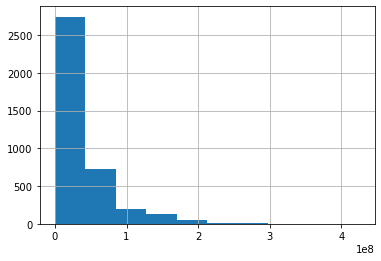

In [26]:
# Data Exploration
# Budget histogram

movies_df['budget'].hist();

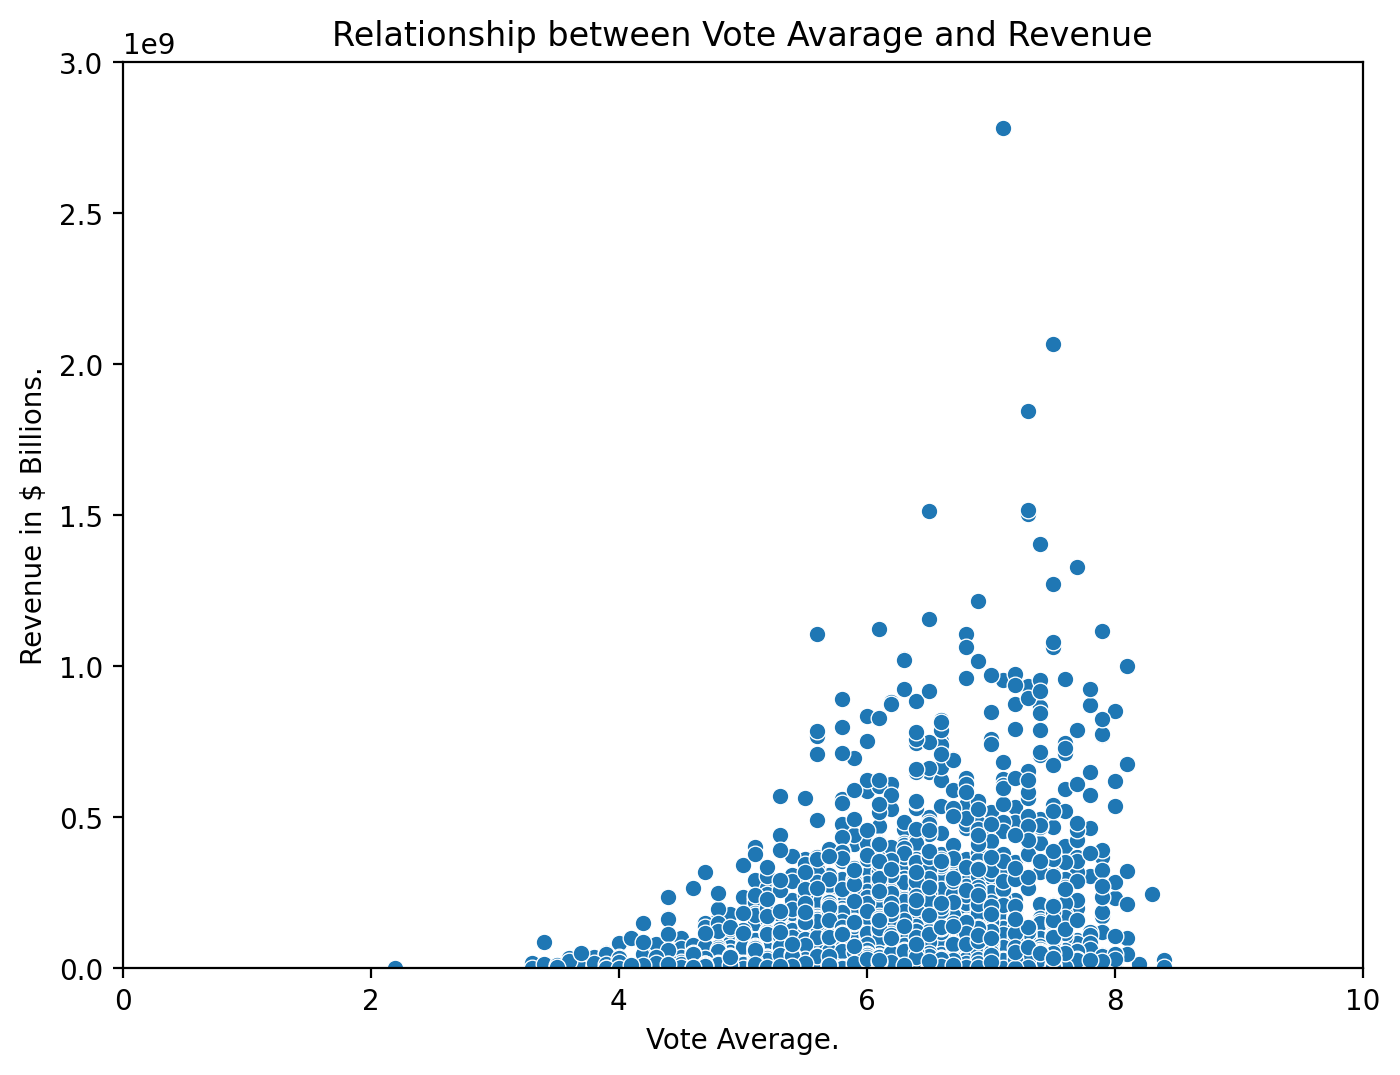

In [77]:
# scatter plot to show relationship between vote average and revenue

plt.figure(figsize=(8, 6), dpi=200)

ax = sns.scatterplot(data=movies_df,
               x='vote_average',
               y='revenue');
ax.set(xlim=(0, 10),
       ylim=(0, 3000000000),
       title='Relationship between Vote Avarage and Revenue',
      xlabel= 'Vote Average.',
      ylabel="Revenue in $ Billions.")

plt.show()






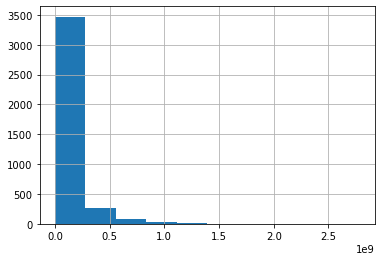

In [27]:
# revenue histogram

movies_df['revenue'].hist();

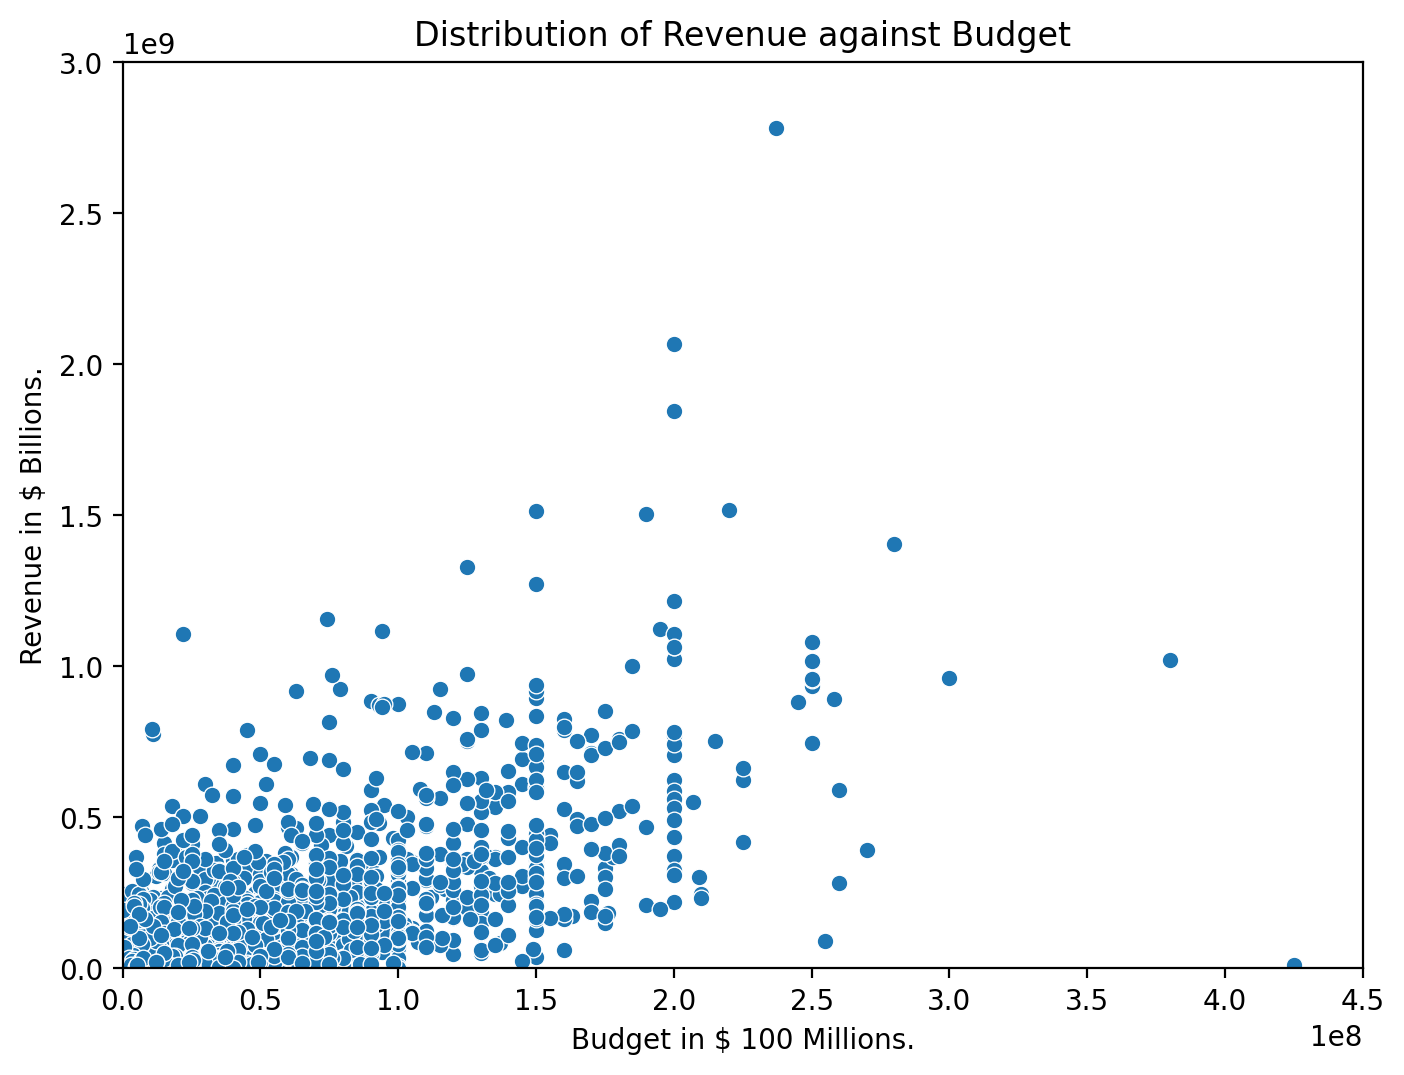

In [64]:
# Scatter Plot to show the relationship between budget and revenue
plt.figure(figsize=(8, 6), dpi=200)

ax = sns.scatterplot(data=movies_df,
               x='budget',
               y='revenue');
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       title='Distribution of Revenue against Budget',
      xlabel= 'Budget in $ 100 Millions.',
      ylabel="Revenue in $ Billions.")
plt.show()

In [29]:
# Convert Years to decades
# You can accomlish by using the DatetimeIndex()

dt_index = pd.DatetimeIndex(movies_df.release_date)

years = dt_index.year
years


Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            1978, 1978, 1978, 1978, 1978, 2066, 2066, 2066, 2066, 2066],
           dtype='int64', name='release_date', length=3854)

In [30]:
# To convert years to decades we can use the following approaches.
# Take the years and use floor division with 10 and the multiply with 10 to convert fully to decades

decades = years//10*10
movies_df['decade'] = decades



In [31]:
movies_df.tail()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,decade
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,131,Drama,2066-06-21,74,7.5,5.038511e+07,2.266436e+08,2060
10828,0.402730,3000000,13000000,Torn Curtain,128,Mystery|Thriller,2066-07-13,46,6.3,2.015404e+07,8.733419e+07,2060
10829,0.395668,4653000,6000000,El Dorado,120,Action|Western,2066-12-17,36,6.9,3.125892e+07,4.030809e+07,2060
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,8.061618e+07,1.343603e+08,2060
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure|Science Fiction,2066-08-24,42,6.7,3.436265e+07,8.061618e+07,2060


In [65]:
# After converting the release date to year there is a problem with the availability of the year 2060 and beyond.

future_films = movies_df[movies_df['decade'] > 2015]

future_films

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,decade
9719,3.309196,12000000,56715371,2001: A Space Odyssey,149,Science Fiction|Mystery|Adventure,2068-04-05,1708,7.7,7.522756e+07,3.555466e+08,2060
9720,1.152937,5800000,33395426,Planet of the Apes,112,Adventure|Science Fiction|Mystery,2068-02-07,469,7.2,3.635999e+07,2.093547e+08,2060
9724,0.786854,5500000,42300873,Bullitt,113,Action|Crime|Drama|Thriller,2068-10-17,143,6.7,3.447930e+07,2.651826e+08,2060
9727,0.724527,3200000,33395426,Rosemary's Baby,136,Horror|Drama|Mystery,2068-06-12,448,7.3,2.006068e+07,2.093547e+08,2060
9729,0.633129,10000000,16800000,Oliver!,153,Drama|Family|Music,2068-09-26,42,6.2,6.268964e+07,1.053186e+08,2060
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,131,Drama,2066-06-21,74,7.5,5.038511e+07,2.266436e+08,2060
10828,0.402730,3000000,13000000,Torn Curtain,128,Mystery|Thriller,2066-07-13,46,6.3,2.015404e+07,8.733419e+07,2060
10829,0.395668,4653000,6000000,El Dorado,120,Action|Western,2066-12-17,36,6.9,3.125892e+07,4.030809e+07,2060
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,8.061618e+07,1.343603e+08,2060


There were a total of 95 films with 2060 and beyond as their release year.

In [66]:
# I choose to drop the columns associated with this years.

clean_data = movies_df.drop(future_films.index)

clean_data.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,decade
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,2010
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08,2010
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1.012000e+08,2.716190e+08,2010
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1.839999e+08,1.902723e+09,2010
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,1.747999e+08,1.385749e+09,2010


In [67]:
# Check whether the process was successful

clean_data.tail()



,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,decade
10779,0.411826,12000000,22765081,Convoy,110,Action|Comedy|Drama,1978-06-27,31,6.2,4.011241e+07,7.609685e+07,1970
10780,0.409377,3500000,24046533,Invasion of the Body Snatchers,115,Horror|Thriller|Science Fiction|Mystery,1978-12-19,87,6.5,1.169945e+07,8.038036e+07,1970
10788,0.277769,24000000,21049053,The Wiz,134,Adventure|Family|Fantasy|Music|Science Fiction,1978-10-24,30,6.1,8.022482e+07,7.036068e+07,1970
10791,0.236193,6800000,26518355,Damien: Omen II,107,Action|Drama|Horror|Thriller,1978-06-09,71,6.1,2.273036e+07,8.864292e+07,1970
10793,0.226002,1000000,3713768,Watership Down,88,Adventure|Animation|Drama,1978-10-14,67,6.8,3.342701e+06,1.241401e+07,1970


The operation was a success and the 2060s films were dropped. This will allow me to explore the data more deeper.

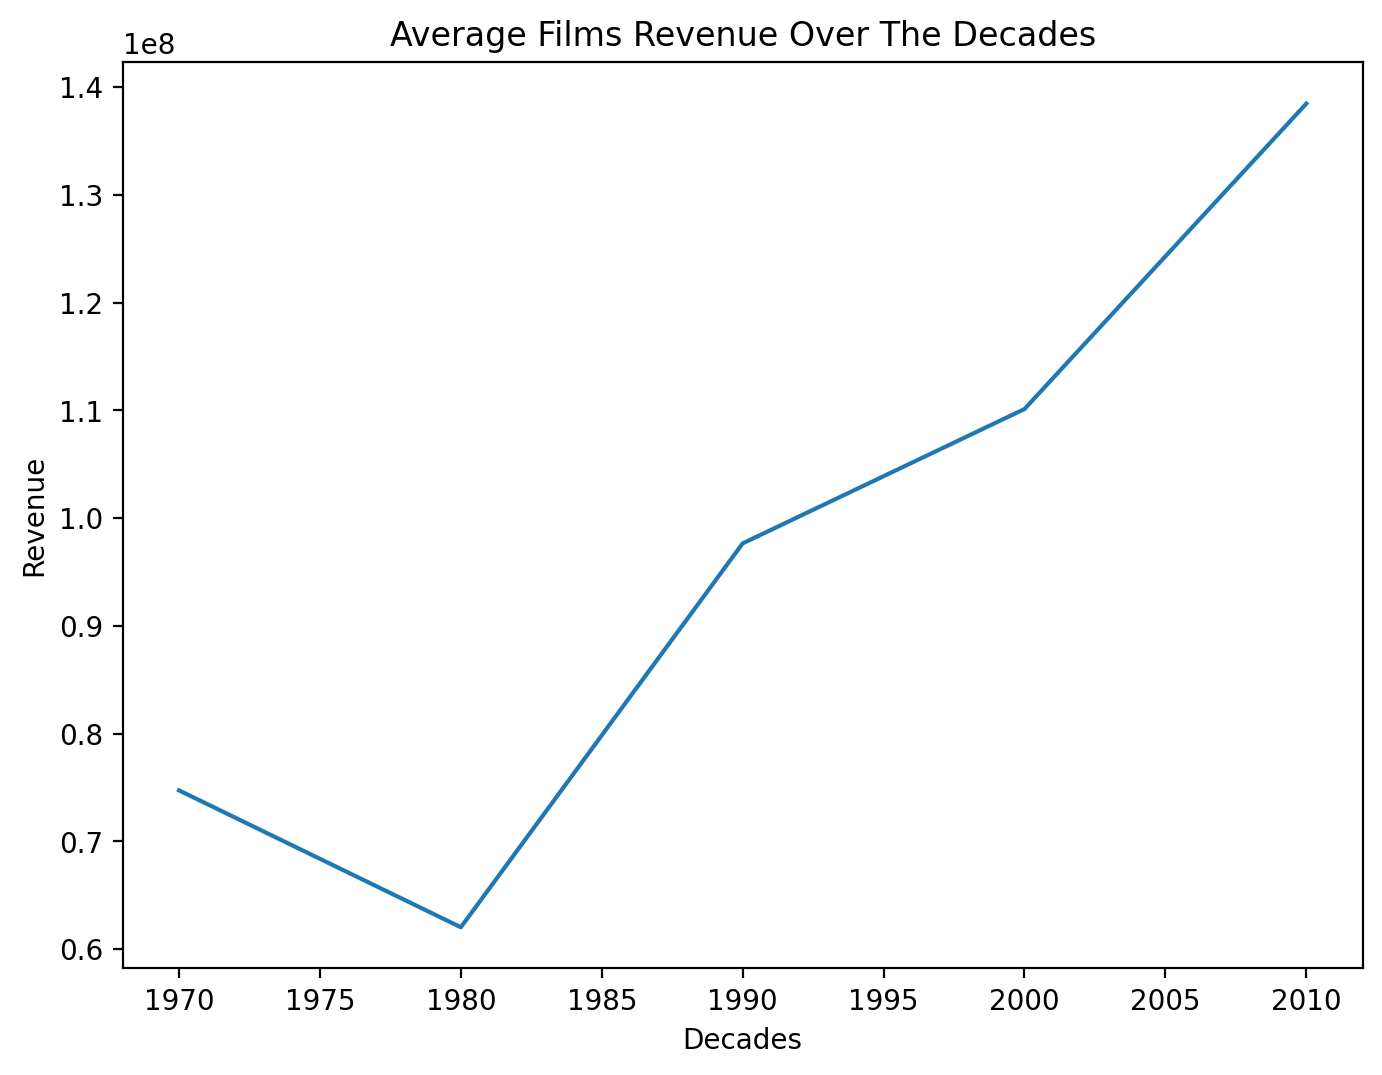

In [69]:
# line chart to show the change in revenue over the decades

revenues = clean_data.groupby('decade')['revenue'].mean()

plt.figure(figsize=(8, 6), dpi=200)

plt.plot(revenues)
plt.title('Average Films Revenue Over The Decades')
plt.xlabel("Decades")
plt.ylabel('Revenue')

plt.show()


## Insight

*There have been a steady increase in revenue accrued from the box office over the past decades.*

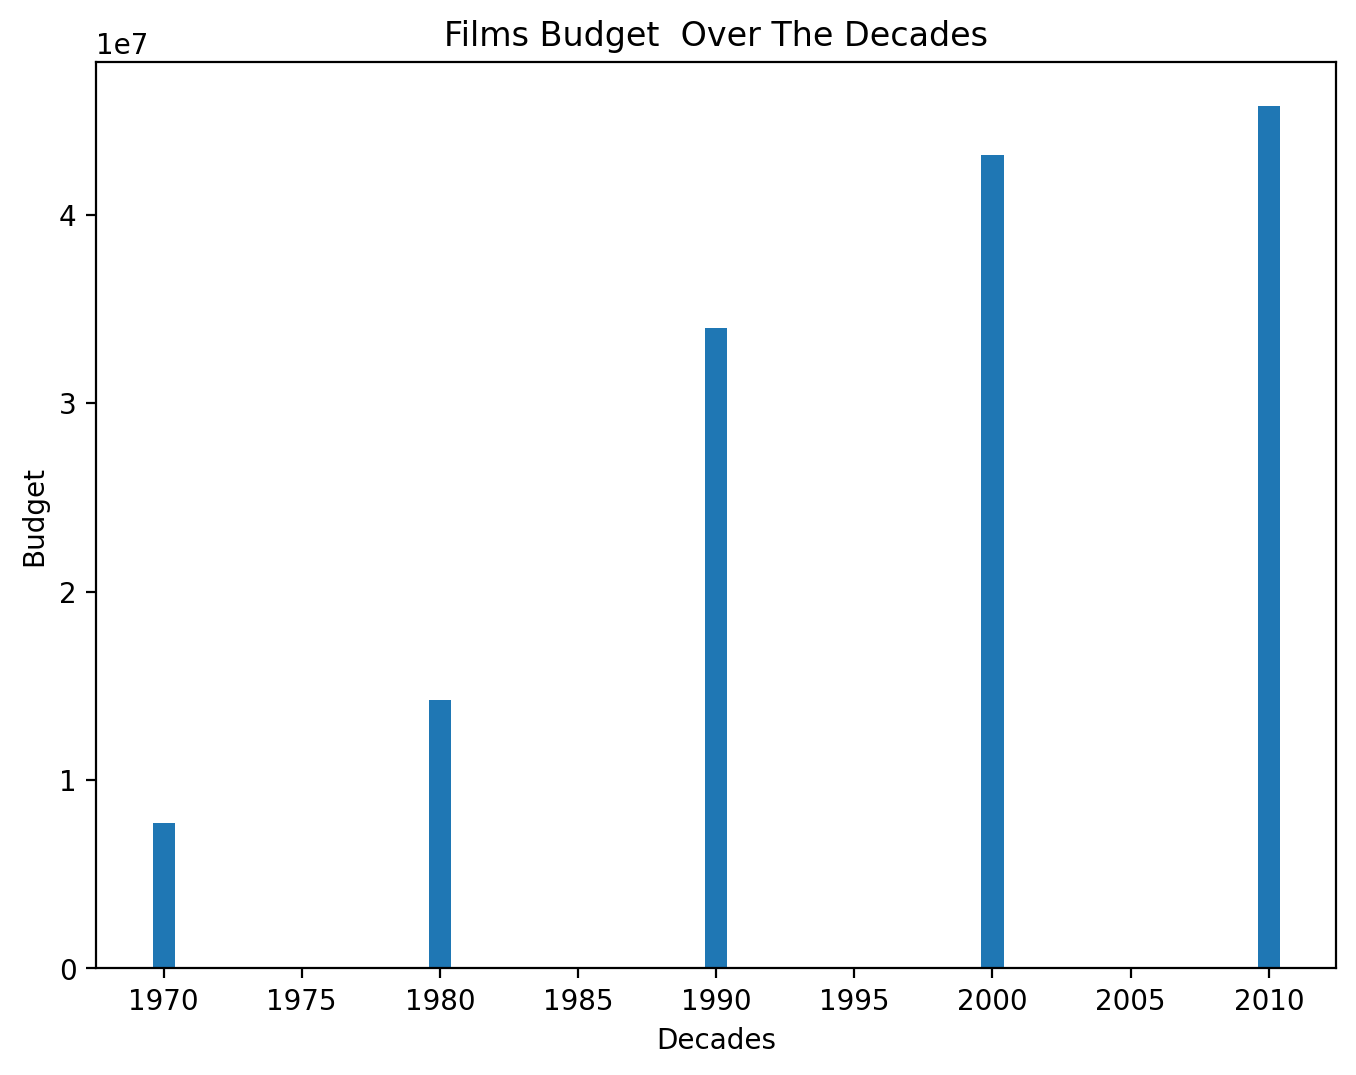

In [68]:
# Bar chart to show the change in budget over the years

budgets = clean_data.groupby('decade')['budget'].mean()

plt.figure(figsize=(8, 6), dpi=200)

plt.bar(budgets.index, budgets.values)
plt.title('Films Budget  Over The Decades')
plt.xlabel("Decades")
plt.ylabel('Budget')

plt.show()


## Insight

*Movies budget have greatly increased over the decades.*

### Research Question 4.  Genres that are most popular over the decades.

In [47]:
# To answer tis question we will need the genres, decades and popularity columns

genres = clean_data[['decade', 'genres', 'popularity']]

genres.head()


,decade,genres,popularity
0,2010,Action|Adventure|Science Fiction|Thriller,32.985763
1,2010,Action|Adventure|Science Fiction|Thriller,28.419936
2,2010,Adventure|Science Fiction|Thriller,13.112507
3,2010,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2010,Action|Crime|Thriller,9.335014


Many films have more than 1 genre this needs to be split into a specific genre. Reference: https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe.

In [49]:
# Split a row with more than one genre into different rows

from itertools import chain

# Return list from series of '|' separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

# Calculate lengths of splits
lens = genres['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
genres = pd.DataFrame({'decade': np.repeat(genres['decade'], lens),                       
                          'genres': chainer(genres['genres']),
                          'popularity': np.repeat(genres['popularity'], lens)})

genres.head()

,decade,genres,popularity
0,2010,Action,32.985763
0,2010,Adventure,32.985763
0,2010,Science Fiction,32.985763
0,2010,Thriller,32.985763
1,2010,Action,28.419936


The next step will be to select the most popular genres over the years.

Reference: https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group

In [50]:
# Define a function for the selection

def function(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year

popular = genres.groupby(['decade', 'genres'], as_index=False).mean()

# Select the most popular genre for each year

most_popular = popular.groupby('decade', as_index=False).apply(function).reset_index(drop=True)
most_popular.head()


,decade,genres,popularity
0,1970,Science Fiction,1.583359
1,1980,Adventure,1.263033
2,1990,Animation,1.693127
3,2000,Fantasy,1.946525
4,2010,Science Fiction,3.652345


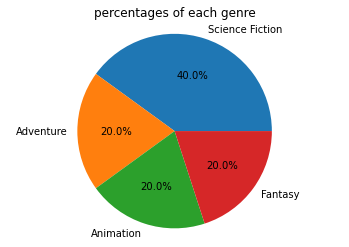

In [71]:
# A pie chart to show the above findings.

sizes = most_popular.genres.value_counts().values
labels = most_popular.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', )
ax1.axis('equal')
plt.title('percentages of each genre')

plt.show()



Scince fiction films seems to have a high percentage compared to others.

<a id='conclusions'></a>
## Conclusions

>*Based on the above analysis the following conclusions can be made:*

1. The overall  film revenue and budget have increased steadily over the years.
2. Scince fiction genre seems to be the popular over the decades.
3. The correlation between budget and revenue is a positive one.
4. Money losing films are a few 27.82%  compared to Money making films 72%.
5. The relationship between vote average and revenue is a positive relation.

#### Limitations

*The dataset contained a number of duplicated, NaN values and zero values thus a large chunk of data had to be droped. In addition, the dataset had 2060 release year and beyond available in the dataset which also needed to be dropped. These issues greatly changed the overall size of the dataset. Last but not least, it has not been well stated whether some of the films were not released yet as time of data scrapping (collection).*
